<center><h1>7SSG2059 Geocomputation 2017/18</h1></center>

<center><h1>Practical 9: Correlation and Regression</h1></center>


# Correlation and Regression

To understand relationships between variables in our data, correlation and regression are useful tools. This week we will look at some possible ways that might use these tools to analysing the data for your final report. 

Specifically we will looks at:
1. correlation and regression for ALL LSOAs
2. correlation and regression for LSOAs grouped by borough
3. mapping correlations by borough

### Setup

As usual we will be using `panda`s for data analysis, with `matplotlib` and `seaborn` for visualisation. Let's load those now: 

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt    #Plotting library used by seaborn, see http://matplotlib.org/users/pyplot_tutorial.html
%matplotlib inline  
import pandas as pd

We also make use of `numpy` for some functions:

In [3]:
import numpy as np

Later we will import further packages for regression and mapping. 

Finally, in our setup, let's load the data into a pandas `DataFrame`:

In [4]:
df = pd.read_csv(
    'https://github.com/kingsgeocomp/geocomputation/blob/master/data/LondonLSOAData.csv.gz?raw=true',
    compression='gzip', low_memory=False) # The 'low memory' option means pandas doesn't guess data types

# Covariance and Correlation

Let's start by seeing how we can calculate covariance using pandas. Remember, covariance is like and unstandardised version of correlation. Handily, pandas has [a method](http://pandas.pydata.org/pandas-docs/stable/computation.html#covariance) to calculate covariance between the `series` in a `DataFrame`:

In [41]:
covmat = df.cov()

print "Covariance matrix:", '\n', covmat, '\n'

Covariance matrix: 
                    USUALRES      HHOLDRES     COMESTRES        POPDEN  \
USUALRES        6.947742e+04  6.468139e+04  4.796036e+03  1.791643e+03   
HHOLDRES        6.468139e+04  6.642811e+04 -1.746722e+03  1.794021e+03   
COMESTRES       4.796036e+03 -1.746722e+03  6.542758e+03 -2.378402e+00   
POPDEN          1.791643e+03  1.794021e+03 -2.378402e+00  3.747253e+03   
HHOLDS          2.256669e+04  2.227598e+04  2.907156e+02  1.669226e+03   
AVHHOLDSZ       1.491969e+01  1.891551e+01 -3.995822e+00 -2.926131e+00   
GreenspaceArea -4.478422e+04 -6.550348e+05  6.102505e+05 -1.459981e+06   
RoadsArea       3.957027e+06  2.802700e+06  1.154326e+06 -3.291002e+06   
Owned           9.682006e+02  1.785891e+03 -8.176906e+02 -4.508202e+03   
SharedOwnshp    1.227615e+03  1.199153e+03  2.846189e+01  1.074200e+02   
SocialRented    9.067732e+03  8.784195e+03  2.835362e+02  3.721093e+03   
PrivateRented   1.099815e+04  1.027531e+04  7.228428e+02  2.294995e+03   
RentFree        3.

That's a lot of numbers... what do they all mean? Usually, I'd suggest you pause and have a think about what these numbers tell us. But as discussed in lecture, correlation is often more useful for comparing and understanding relationships than the raw covariance values. The important thing here is to understand the _structure_ of the matrix produced, before we move on to correlation.  

**TASK:** To ensure you understand the structure of the covariance matrix just created, add values (to 2 decimal places) in the code cells below to provide values for:

- The covariance between HHOLDRES and Owned is ...
- The covariance between PM10max and SocialRented is ...

(_Ask_ if you are not sure how the matrix is structured)

1785.89

127.17

Similar to the covariance method, pandas has [a method](http://pandas.pydata.org/pandas-docs/stable/computation.html#correlation) for calculating the correlation between all series in a DataFrame. If we don't specify what particular correlation we want, the `corr` method calculates Pearson's _r_:

In [42]:
corrmat = df.corr()
print "Pearson correlation coefficient matrix:", '\n', corrmat, '\n'

Pearson correlation coefficient matrix: 
                USUALRES  HHOLDRES  COMESTRES    POPDEN    HHOLDS  AVHHOLDSZ  \
USUALRES        1.000000  0.952098   0.224947  0.111038  0.640762   0.145105   
HHOLDRES        0.952098  1.000000  -0.083785  0.113709  0.646862   0.188142   
COMESTRES       0.224947 -0.083785   1.000000 -0.000480  0.026899  -0.126640   
POPDEN          0.111038  0.113709  -0.000480  1.000000  0.204084  -0.122541   
HHOLDS          0.640762  0.646862   0.026899  0.204084  1.000000  -0.606506   
AVHHOLDSZ       0.145105  0.188142  -0.126640 -0.122541 -0.606506   1.000000   
GreenspaceArea -0.001325 -0.019819   0.058832 -0.185984  0.000795  -0.023868   
RoadsArea       0.099461  0.072045   0.094548 -0.356185  0.108598  -0.069555   
Owned           0.027146  0.051208  -0.074709 -0.544262  0.025577   0.015843   
SharedOwnshp    0.309718  0.309403   0.023400  0.116696  0.342919  -0.129111   
SocialRented    0.239424  0.237201   0.024396  0.423063  0.346237  -0.224815   

The matrix produced has the same structure as for the covariance matrix. 

**Task:**Let's identify the Pearson correlation coefficient (i.e. value) for the same pairs of variables as we did for covariance (edit the cells below again, providing values to three decimal places): 

- The Pearson correlation between HHOLDRES and Owned is ...
- The Pearson correlation between PM10max and SocialRented is ...

In [ ]:
0.051

In [ ]:
0.149

**Task:** Which pair of variables has the strongest relationship? [Edit this cell]

Compare the Pearson _r_ values to the covariance values. Check you understand why the values are different and why correlation values are often more useful. 

Even though the 'standardised' correlation values are a bit easier to read than the covariance values, it would still be useful to think about how we can visualise these numbers for quick reference. The seaborn `heatmap` [plot](http://seaborn.pydata.org/generated/seaborn.heatmap.html) is useful in this circumstance:  

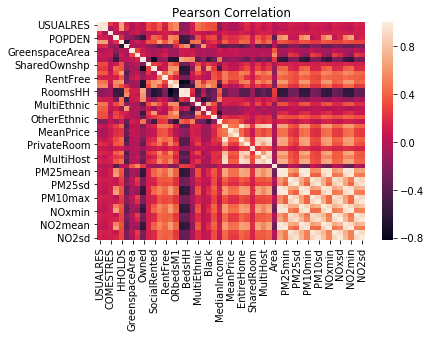

In [44]:
sb.heatmap(corrmat)
plt.title("Pearson Correlation")

Compare the plot just created to the Pearson correlation matrix to check you understand how the heatmap plot represents the matrix. 

Another plot that is often useful is the pairplot... too many variables in our DF so we need to sub-set.


In [47]:
print(df.columns)

Index([u'LSOA11CD', u'LSOA11NM', u'MSOA11CD', u'MSOA11NM', u'LAD11CD',
       u'LAD11NM', u'RGN11CD', u'RGN11NM', u'USUALRES', u'HHOLDRES',
       u'COMESTRES', u'POPDEN', u'HHOLDS', u'AVHHOLDSZ', u'geometry',
       u'GreenspaceArea', u'RoadsArea', u'Owned', u'SharedOwnshp',
       u'SocialRented', u'PrivateRented', u'RentFree', u'ORroomsM1',
       u'ORbedsM1', u'RoomsHH', u'BedsHH', u'White', u'MultiEthnic', u'Asian',
       u'Black', u'OtherEthnic', u'MedianIncome', u'SumPrice', u'MeanPrice',
       u'MedianPrice', u'EntireHome', u'PrivateRoom', u'SharedRoom',
       u'SmallHost', u'MultiHost', u'PropertyCount', u'Area', u'PM25mean',
       u'PM25min', u'PM25max', u'PM25sd', u'PM10mean', u'PM10min', u'PM10max',
       u'PM10sd', u'NOxmean', u'NOxmin', u'NOxmax', u'NOxsd', u'NO2mean',
       u'NO2min', u'NO2max', u'NO2sd'],
      dtype='object')


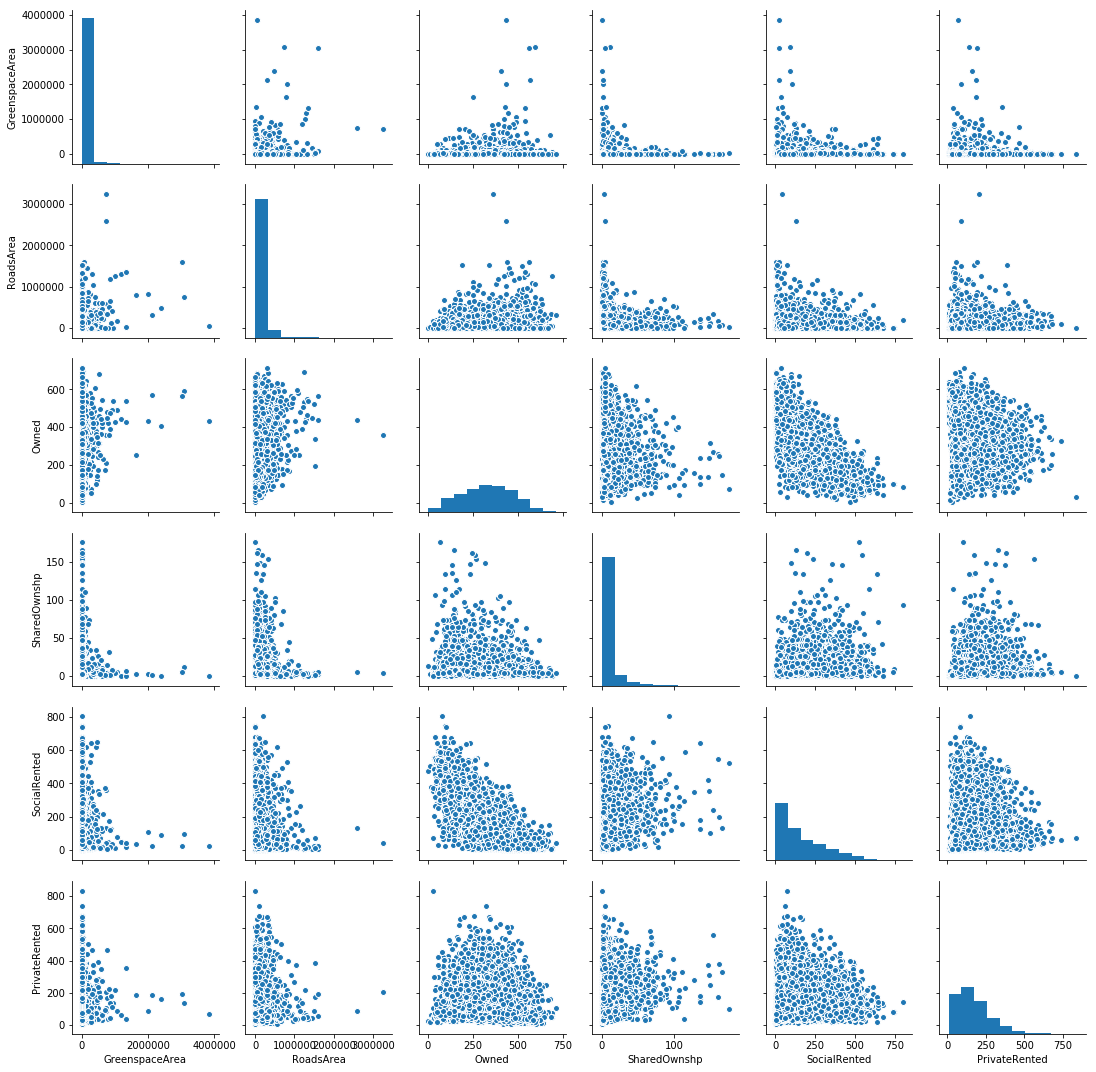

In [11]:
sub = df.loc[:,'GreenspaceArea':'PrivateRented']
fig = sb.pairplot(sub)

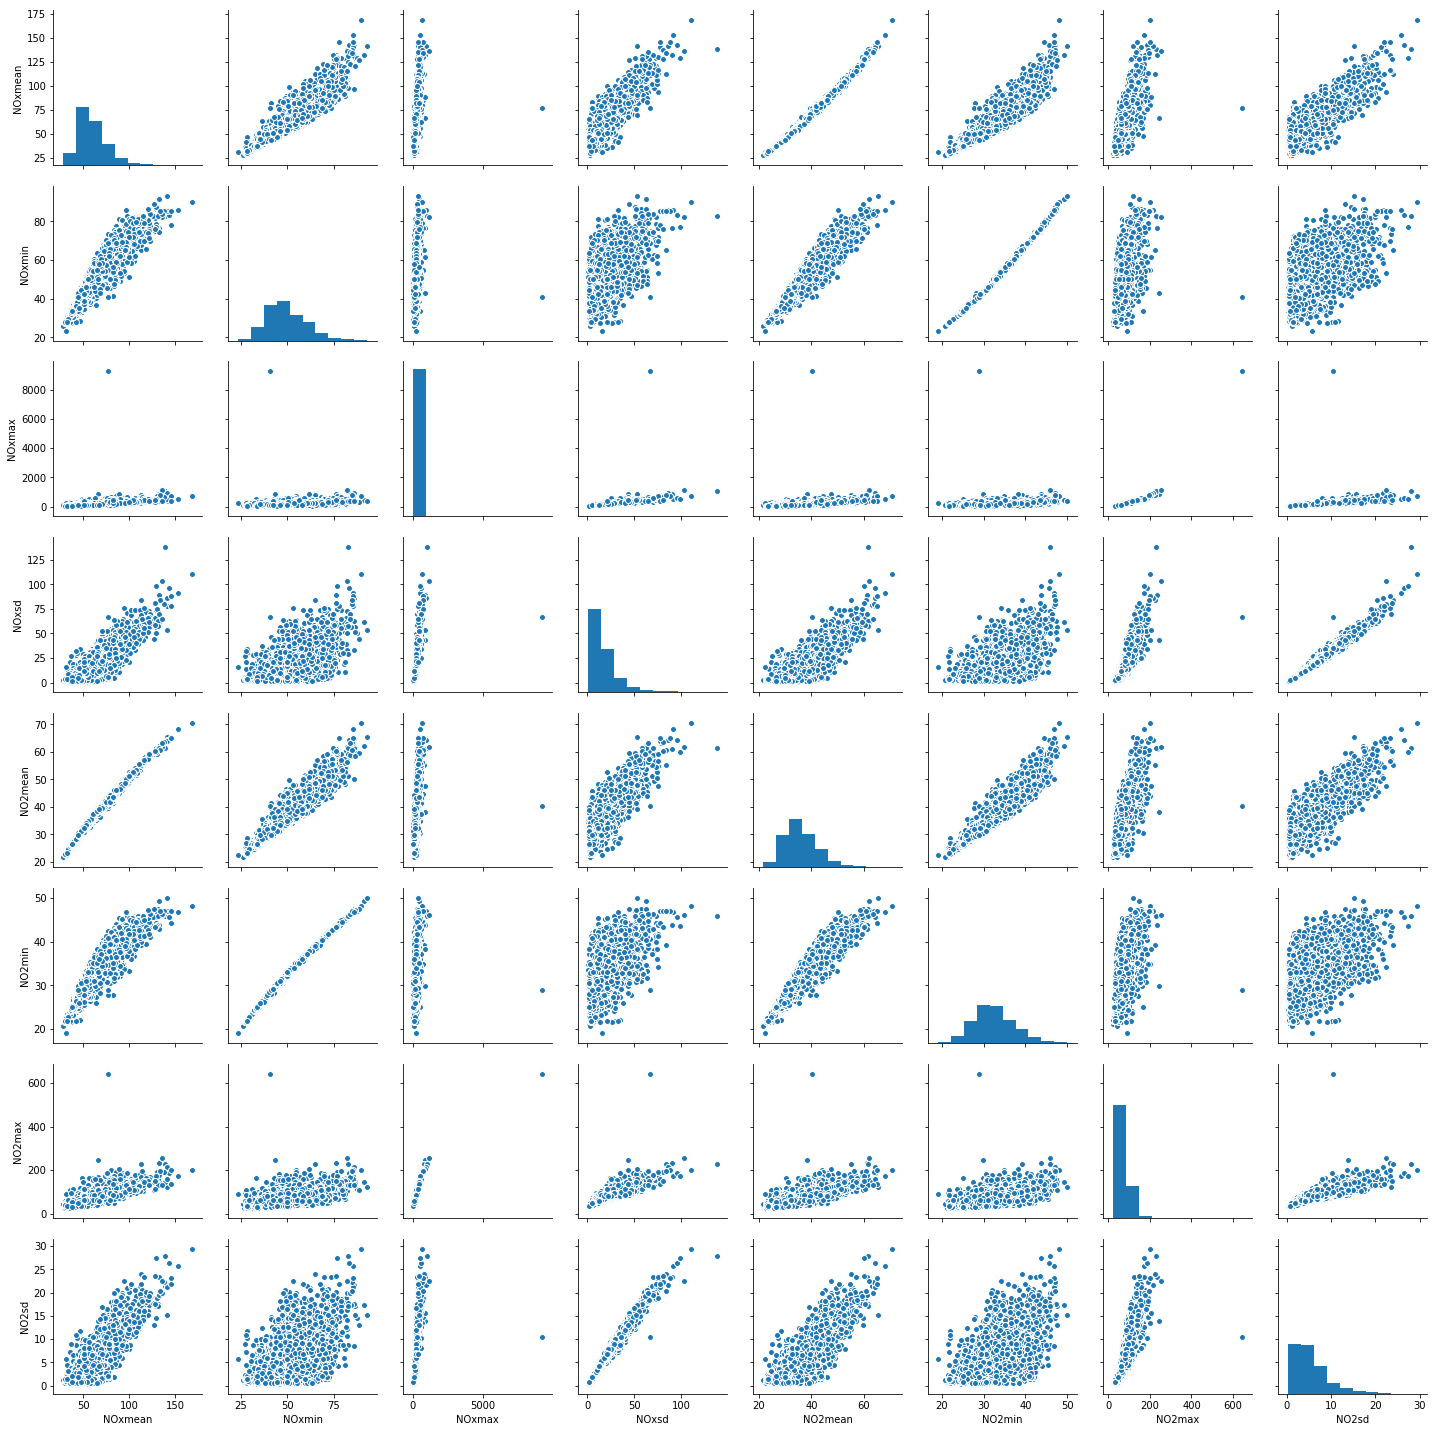

In [12]:
NO = df.loc[:,'NOxmean':]
fig = sb.pairplot(NO)

Create jointplots for the pairs above...

HHOLDRES and Owned: 0.022071  #weak relationship so distribution/linearity not much of an issue
PM10max and SocialRented 0.201249 #non-normal distribution of variables means spearman more appropriate


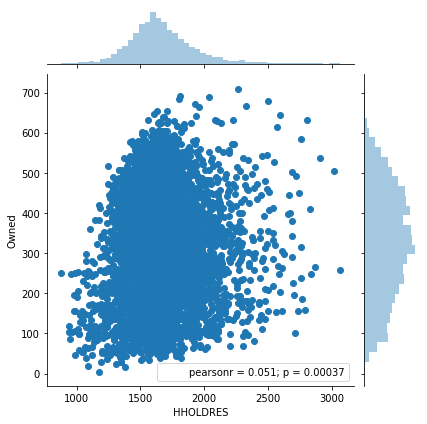

In [16]:
sb.jointplot(x="HHOLDRES", y="Owned", data=df) 

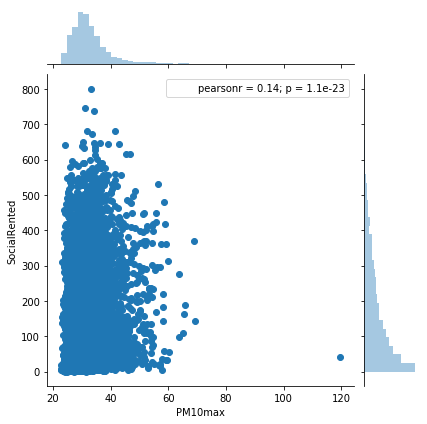

In [17]:
sb.jointplot(x="PM10max", y="SocialRented", data=df) 

So run spearman correlation matrix (and heatmap)

In [14]:
corspmat = df.corr(method = "spearman")
print "Spearman rank correlation coefficient matrix:", '\n', corspmat, '\n'

Spearman rank correlation coefficient matrix: 
                USUALRES  HHOLDRES  COMESTRES    POPDEN    HHOLDS  AVHHOLDSZ  \
USUALRES        1.000000  0.970593   0.114401  0.175725  0.588621   0.122670   
HHOLDRES        0.970593  1.000000  -0.013346  0.176156  0.586123   0.159311   
COMESTRES       0.114401 -0.013346   1.000000 -0.009502  0.125836  -0.177783   
POPDEN          0.175725  0.176156  -0.009502  1.000000  0.227812  -0.151881   
HHOLDS          0.588621  0.586123   0.125836  0.227812  1.000000  -0.645775   
AVHHOLDSZ       0.122670  0.159311  -0.177783 -0.151881 -0.645775   1.000000   
GreenspaceArea  0.016633  0.006180   0.025790 -0.248642  0.018419  -0.009739   
RoadsArea       0.141281  0.118119   0.130212 -0.296672  0.158692  -0.098757   
Owned          -0.001498  0.022071  -0.038045 -0.556788  0.005340   0.048141   
SharedOwnshp    0.318365  0.314798   0.030414  0.212157  0.349439  -0.150312   
SocialRented    0.226211  0.220237   0.018942  0.426159  0.369218  -0.255

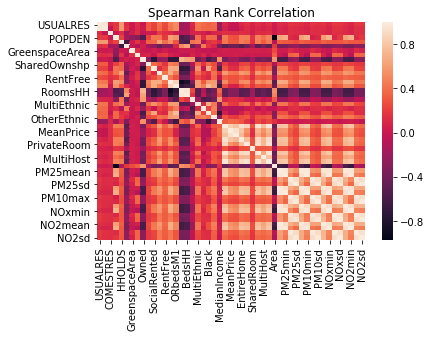

In [15]:
sb.heatmap(corspmat)
plt.title("Spearman Rank Correlation")

Remember you could save this plot to file (in the same directory where your notebook is saved) for use in your reports by doing something like:

In [27]:
sb.heatmap(corspmat)
plt.title("Spearman Rank Correlation")
plt.savefig('Pairplot-Spearman.png', bbox_inches='tight')
plt.close()

# Regression

Now that we have seen how you might use correlation to examine the data, let's move on to look at regression by picking up on some analysis you did in Week 7. If you look back to Week 7, you'll remember that you looked at the possible relationship between pollution and the presence of major roads: 

In [ ]:
g = sns.jointplot(x=df.RoadsArea, y=df.NOxmax, size=6)
g.fig.suptitle('NOx (Max) against Roads Area"', fontsize=18,color="r",alpha=0.5)

From Week 7:

>It looks like our RoadsArea data is very heavily skewed and that there are a lot of very low values in the data. There also seems to a be at least one major outlier that is _so_ different in scale that I'd want to know whether to even keep it in the analysis -- it looks like what would be called a 'leverage point' in a regression model: something that is so 'out of whack' that it alters the entire regression! 

>Let's try stripping that out and running this code again:

The outlier LSOAs are: Hillingdon 031A


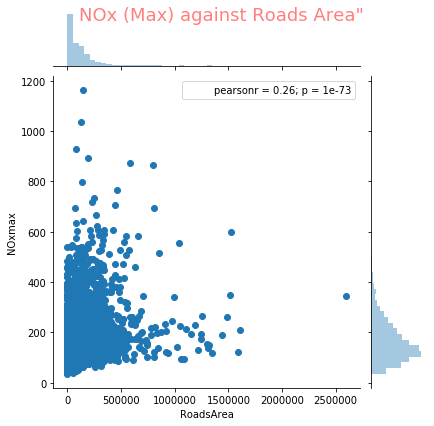

In [29]:
print("The outlier LSOAs are: " + ",".join(df[df.NOxmax > 4000]['LSOA11NM'].values))
df = df[df.NOxmax < 4000]

g = sb.jointplot(x=df.RoadsArea, y=df.NOxmax, size=6)
g.fig.suptitle('NOx (Max) against Roads Area"', fontsize=18, color="r",alpha=0.5)

In Week 7, you then went on to look at how a transformation might be useful to address the skew of the data. Before we do that again this week to see why it's useful for regression, let's see how the Spearman rank correlation would look for these variables:

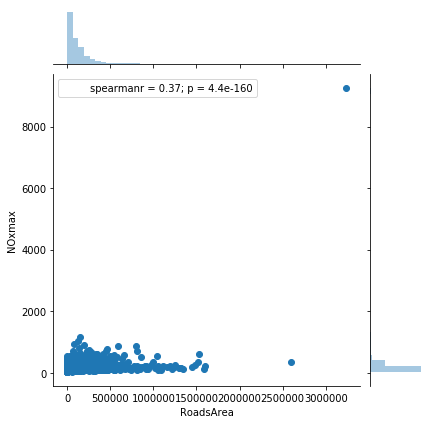

In [28]:
from scipy.stats import spearmanr
sb.jointplot(x="RoadsArea", y="NOxmax", data=df, stat_func=spearmanr)

Note that in the code above we imported the `spearmanr` funtction from the `scipy.stats` [package](https://docs.scipy.org/doc/scipy/reference/stats.html), then we passed that to the `jointplot`.

Also, note how the Spearman rank correlation coefficient is greater than the Pearson correlation coefficient (in the previous plot). Think about how ranking the data might improve the correlation, compared to looking at the absolute values themselves. 

Right, back to Week 7...

>To create a new series in the data frame containing the natural log of the original value it’s a similar process to what we've done before, but since pandas doesn't provide a log-transform operator (i.e. you can’t call `df.Owned.log()` ) we need to use the `numpy` package:
```python
series = pd.Series(np.log(df.RoadsArea))
```
>Try performing the transformation and then `describe()` the results in the coding area below. Is it more clear to you now why a log-transform is a non-linear transformation?

Here's the code for you:

count   4,835.0000
mean        8.6907
std         4.9109
min         0.0000
25%         7.4116
50%        11.2448
75%        11.9210
max        14.9898
Name: RoadsArea, dtype: float64


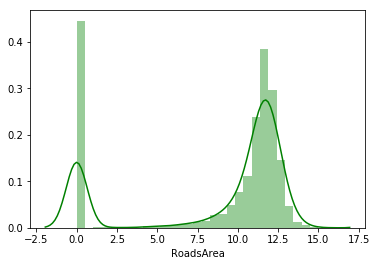

In [12]:
pd.set_option('display.float_format', lambda x: '{:,.4f}'.format(x))

series = pd.Series(np.log(my_df.RoadsArea + 1))
print(series.describe())
sb.distplot(series, color='green')

Week 7:
>Now this _is_ interesting: the output of the graph shows what seems to be two quite different things going on in our data! We've obviously got the LSOAs that contain _no_ major roads, but then we've got something else that is _much_ closer to 'normal' (though obviously not properly normal as there is clear evidence of negative skew). Technically, this is closer to _log-normal_ ... 

From this point on we'll leave Week 7 behind, but as we go on to see if we can use regression to estimate the importance of roads for NOx we'll see how transforms are useful for regression. 

First, though let's remove the LSOAs from our data that have no major roads. 

In [62]:
hrds = df.loc[df.RoadsArea > 0] # hrds == has (major) roads

How many LSOAs do we have left? Add a line of code here to check how many LSOAs are in the `hrds` `DataFrame`:

In [39]:
##remove!
len(hrds.RoadsArea)

3723

Thinking back to what Lumley _et al._ (2002, p.166) said about how; 

>"…linear regression [does] not require any assumption of Normal distribution in sufficiently large samples. Previous simulations studies show that “sufficiently large” is often under 100, and even for our extremely non-Normal medical cost data it is less than 500."

Hopefully, it's clear that in the `hrds` data we maybe don't need to worry about the fact that the `RoadsArea` variable has a log-normal distribution. So let's just fit a regression with our un-transformed data and see what we get.   

In python, linear regression can be performed using functions available in the `statsmodels` [package](http://www.statsmodels.org/stable/), and specifically using the [OLS function](http://www.statsmodels.org/devel/examples/notebooks/generated/ols.html) from the `statsmodels.api`. So let's import `statsmodels.api` first:     

In [22]:
import statsmodels.api as sm 

C:\ProgramData\Anaconda2\envs\gsa2017\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Using the OLS function to fit a regression requires we create an OLS object first, then use the `fit` method on that object. To create the OLS object we can use the `from_formula` method to pass the equation of the model we want (as well as indicating what the data are that we are using):

In [40]:
NOxmax_roads_mod = sm.OLS.from_formula("NOxmax ~ RoadsArea", data = hrds) 
NOxmax_roads_mod_fit = NOxmax_roads_mod.fit()

What happened...? Well, it looks like nothing happened but we have indeed now fit a regression model! 

To check this we we should look at a summary of the model (by using the `summary` method on the 'fit model' object we just created) to understand what the model can tell us:

In [41]:
print(NOxmax_roads_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 NOxmax   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     135.9
Date:                Wed, 15 Nov 2017   Prob (F-statistic):           7.15e-31
Time:                        16:38:25   Log-Likelihood:                -22462.
No. Observations:                3723   AIC:                         4.493e+04
Df Residuals:                    3721   BIC:                         4.494e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.3006      2.229     76.395      0.0

Questions here:

- what is r2
- what is p-value?
- what is the effect size?  (might need to look at metadata for units!) roads in sq_m, NOx in microgrammes per metre cubed

but now need to check residuals... 

first histogram:

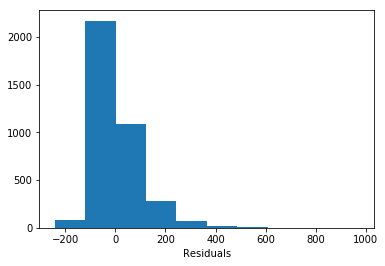

In [15]:
#Histogram of residuals
ax = plt.hist(NOxmax_roads_mod.resid)
plt.xlabel('Residuals')
#plt.savefig('minTemp-Lat-ResidsHist.png', bbox_inches='tight')
#plt.close()

next standardised residuals:

Mean of residuals: -0.0000


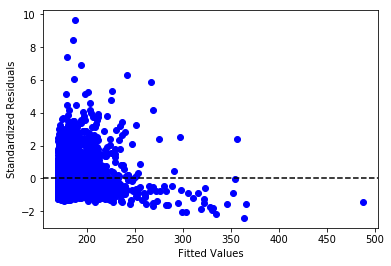

In [37]:
#calculate standardized residuals ourselves
NOxmax_roads_mod_sr = (NOxmax_roads_mod.resid / np.std(NOxmax_roads_mod.resid)) 

#standardized residuals vs fitted values
ax = plt.plot(NOxmax_roads_mod.fittedvalues, NOxmax_roads_mod_sr, 'bo')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')                
#plt.savefig('minTemp-Lat-StdResids.png', bbox_inches='tight')
#plt.close()


Definitely not constant variance

Thinking back to what Lumley _et al._ (2002, p.166) said about how; 

>"Linear regression does assume that the variance of the outcome variable is approximately constant"

So we need to sort this out. 

so let's try the model with log transformed data

In [65]:
hrds['logRoadsArea'] = np.log(hrds['RoadsArea'])
hrds['logNOxmax'] = np.log(hrds['NOxmax'])

hrds.head()

C:\ProgramData\Anaconda2\envs\gsa2017\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda2\envs\gsa2017\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,NOxmean,NOxmin,NOxmax,NOxsd,NO2mean,NO2min,NO2max,NO2sd,logRoadsArea,logNOxmax
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,116.7335,74.3843,368.4532,46.8249,57.8972,43.0877,127.2501,14.9486,11.800513,5.909314
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,86.3397,72.6057,191.7217,17.0302,47.6356,42.3820,80.7450,6.3878,12.176133,5.256045
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,86.1607,74.2665,189.0205,17.5927,47.3078,42.9148,81.4941,6.0950,10.932042,5.241855
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,132.1101,76.5674,893.0905,89.5282,61.1162,43.7231,234.1228,23.2659,12.158660,6.794688
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,51.3147,46.9127,57.4380,2.1936,32.5846,31.1267,34.9157,0.7742,10.264573,4.050706


In [ ]:
#fit the regression
logNOxmax_logRoads_mod = sm.OLS.from_formula('logNOxmax ~ logRoadsArea', data = hrds)
logNOxmax_logRoads_mod_fit = logNOxmax_logRoads_mod.fit() 

Before looking at the summary, let's look at the residuals...

Ask students to write code:

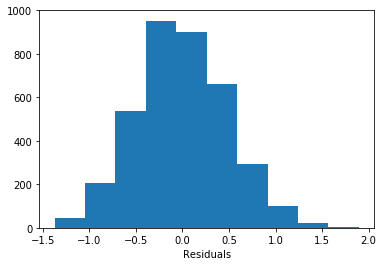

In [67]:
#Histogram of residuals
ax = plt.hist(logNOxmax_logRoads_mod_fit.resid)
plt.xlabel('Residuals')
#plt.savefig('minTemp-Lat-ResidsHist.png', bbox_inches='tight')
#plt.close()

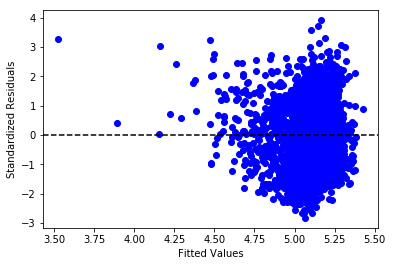

In [69]:
#calculate standardized residuals ourselves
logNOxmax_roads_mod_sr = (logNOxmax_logRoads_mod_fit.resid / np.std(logNOxmax_logRoads_mod_fit.resid)) 

#standardized residuals vs fitted values
ax = plt.plot(logNOxmax_logRoads_mod_fit.fittedvalues, logNOxmax_roads_mod_sr, 'bo')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')                
#plt.savefig('minTemp-Lat-StdResids.png', bbox_inches='tight')
#plt.close()

Looks better! So now, let's look at the summary 

In [66]:
#view summary output of the model
print logNOxmax_logRoads_mod_fit.summary()

                            OLS Regression Results                            
Dep. Variable:              logNOxmax   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     275.1
Date:                Wed, 15 Nov 2017   Prob (F-statistic):           1.14e-59
Time:                        17:01:08   Log-Likelihood:                -2588.5
No. Observations:                3723   AIC:                             5181.
Df Residuals:                    3721   BIC:                             5193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.0852      0.062     65.739   

Questions here:

- what is r2  (not very good!)
- what is p-value? (zero, but might be expected 
- what is the effect size?  remember this is log values! So see Table 2 of Lin et al. (in lecture slides)
- what is the confidence interval? 

And a a quick look at a scatter plot shows why the r2 is so poor. 

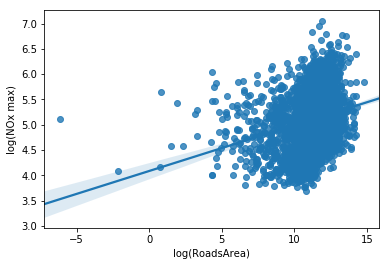

In [71]:
h = sb.regplot(x=hrds.logRoadsArea, y=hrds.logNOxmax)  
plt.xlabel('log(RoadsArea)')
plt.ylabel('log(NOx max)')    

# Regression by Brorough

One reason there may be a poor relationship for our entire data set is that there may be variation in the relationship between roads and NOx across london. 

so let's have a look at how we could fit correlations or regressions by individual boroughs  (see Week 6 for grouping)

In [74]:
grouped = hrds.groupby('LAD11NM')
print(grouped.groups.keys())

['Islington', 'Southwark', 'Kensington and Chelsea', 'Greenwich', 'Hounslow', 'Lewisham', 'Lambeth', 'Barnet', 'Hammersmith and Fulham', 'Westminster', 'Barking and Dagenham', 'Enfield', 'City of London', 'Croydon', 'Merton', 'Haringey', 'Harrow', 'Hackney', 'Kingston upon Thames', 'Havering', 'Waltham Forest', 'Hillingdon', 'Bexley', 'Ealing', 'Sutton', 'Bromley', 'Redbridge', 'Newham', 'Wandsworth', 'Tower Hamlets', 'Camden', 'Richmond upon Thames', 'Brent']


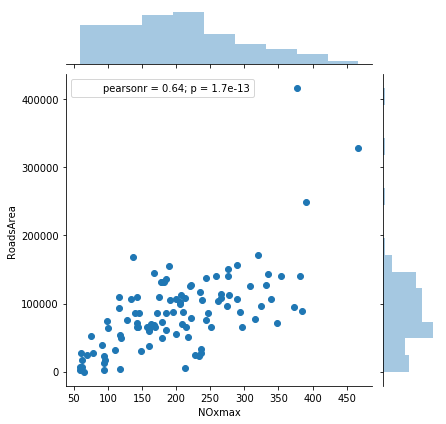

In [89]:
Hackney = grouped.get_group('Hackney')
sb.jointplot(x='NOxmax', y='RoadsArea', data=Hackney) 

Looks more promising! 

Task: fit regression for Hackney  (linear or logged?)

In [78]:
h_NOxmax_roads_mod = sm.OLS.from_formula("NOxmax ~ RoadsArea", data = Hackney) 
h_NOxmax_roads_mod_fit = h_NOxmax_roads_mod.fit()
print(h_NOxmax_roads_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 NOxmax   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     72.26
Date:                Wed, 15 Nov 2017   Prob (F-statistic):           1.66e-13
Time:                        17:26:03   Log-Likelihood:                -586.01
No. Observations:                 104   AIC:                             1176.
Df Residuals:                     102   BIC:                             1181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    119.6474     11.838     10.107      0.0

Better r2!

But look at how many data points.... 104 so getting close to worrying about residuals...


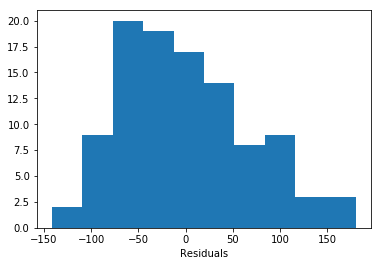

In [80]:
ax = plt.hist(h_NOxmax_roads_mod_fit.resid)
plt.xlabel('Residuals')
#plt.savefig('minTemp-Lat-ResidsHist.png', bbox_inches='tight')
#plt.close()

Plot them up: not the best. From last jointplot, it looks like NOxmax is the problem, so try model with logNOxmax

In [92]:
h_logNOxmax_roads_mod = sm.OLS.from_formula("logNOxmax ~ RoadsArea", data = Hackney) 
h_logNOxmax_roads_mod_fit = h_logNOxmax_roads_mod.fit()
print(h_logNOxmax_roads_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              logNOxmax   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     61.58
Date:                Wed, 15 Nov 2017   Prob (F-statistic):           4.36e-12
Time:                        17:48:49   Log-Likelihood:                -47.967
No. Observations:                 104   AIC:                             99.93
Df Residuals:                     102   BIC:                             105.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7701      0.067     71.131      0.0

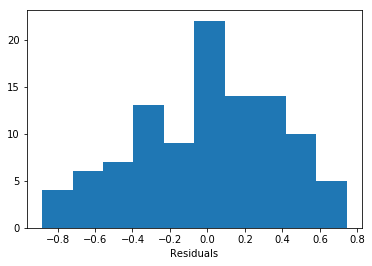

In [93]:
ax = plt.hist(h_logNOxmax_roads_mod_fit.resid)
plt.xlabel('Residuals')
#plt.savefig('minTemp-Lat-ResidsHist.png', bbox_inches='tight')
#plt.close()

Much more normal, probably happy with this (given we still gave ~100 data potins. ). But in other cases we might take log of BOTH variables...

Check standard resids, just in case

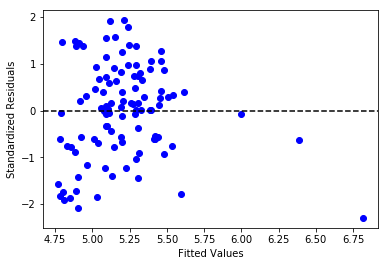

In [83]:
#calculate standardized residuals ourselves
h_logNOxmax_roads_mod_sr = (h_logNOxmax_roads_mod_fit.resid / np.std(h_logNOxmax_roads_mod_fit.resid)) 

#standardized residuals vs fitted values
ax = plt.plot(h_logNOxmax_roads_mod_fit.fittedvalues, h_logNOxmax_roads_mod_sr, 'bo')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')                
#plt.savefig('minTemp-Lat-StdResids.png', bbox_inches='tight')
#plt.close()

Not too bad! So let's interpret that summary...

Questions here:

- what is r2
- what is p-value?
- what is the effect size?  (might need to look at metadata for units!) roads in sq_m, NOx in microgrammes per metre cubed
- what is the confidence interval? 

Let's see how to calculate correlations for all boroughs using grouping and a loop!

In [98]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

boroughs = hrds.groupby('LAD11NM')
bnames = grouped.groups.keys()

r = []
sp = []
n = []

for name in bnames:

    borough = boroughs.get_group(name)
    
    y = np.log(borough['NOxmax'])
    X = np.log(borough['RoadsArea'])
    
    pr = pearsonr(X,y)
    spn = spearmanr(X,y)
    
    r.append(pr[0])
    sp.append(spn[0])
    n.append(len(y))

    
rSummary = pd.Series(r, index=bnames)
spSummary = pd.Series(sp, index=bnames)
nSummary = pd.Series(n, index=bnames)
    
mySummary = pd.concat([rSummary, spSummary, nSummary], axis=1)
mySummary = mySummary.rename(columns={0: 'r', 1: 'sp', 2: 'n'})

print mySummary

                               r        sp    n
Islington               0.383907  0.390208  119
Southwark               0.166550  0.221520  132
Kensington and Chelsea  0.521947  0.470157   90
Greenwich               0.406033  0.398125  120
Hounslow                0.396071  0.344555  129
Lewisham               -0.026792  0.156988  107
Lambeth                 0.167267  0.158162  117
Barnet                  0.379807  0.372189  183
Hammersmith and Fulham  0.298477  0.407532  104
Westminster             0.558504  0.623550  116
Barking and Dagenham    0.543089  0.595495  103
Enfield                 0.464516  0.407034  149
City of London          0.548622  0.542857    6
Croydon                 0.340002  0.261124  147
Merton                  0.343944  0.378962   91
Haringey                0.386527  0.402431  120
Harrow                  0.474313  0.535881  103
Hackney                 0.583771  0.605708  104
Kingston upon Thames    0.338344  0.369986   81
Havering                0.514355  0.5234

In [ ]:
#code to map these borough-level correlations

## Summary

In this practical we have...


## Exercises

**Task**

Build on the code for looping to cal correlations for all boroughs to do similar but fit regressions (for specified variables in a DF) for ALL boroughs, summarising results in Table 
#with help from https://stackoverflow.com/questions/24088439/how-to-apply-ols-from-statsmodels-to-groupby

In [110]:
#with help from https://stackoverflow.com/questions/24088439/how-to-apply-ols-from-statsmodels-to-groupby

linear_regression_grouped = hrds.groupby('LAD11NM')

r2 = []
m = []
c = []
n = []
mp = []
cp = []
sp = []
r = []

groups = linear_regression_grouped.groups.keys()

for group in groups:
    print  group 
    
    #create data objects
    rdf= linear_regression_grouped.get_group(group)
    y = np.log(rdf['NOxmax'])
    X = np.log(rdf['RoadsArea'])
        
    #plot file
    #fig = plt.figure(group)                         #create a plot object
    #fig = sb.regplot(x=np.log(rdf.RoadsArea), y=np.log(rdf.NOxmax))            #add the seaborn pairplot for our dataset
    #plt.savefig('{0}_Regplot.png'.format(group), bbox_inches='tight')     #save the plot with the given filename
    #plt.close()     
    
    from scipy.stats import pearsonr
    pr = pearsonr(X,y)
    
    from scipy.stats import spearmanr
    spn = spearmanr(X,y)
    
    #fit model using OLS
    X= sm.add_constant(X)
    model = sm.OLS(y,X)
    results = model.fit()
    
    
    #get summary of results  (or do this as a dict??)
    r2.append(results.rsquared)
    r.append(pr[0])
    sp.append(spn[0])
    m.append(results.params[1])
    c.append(results.params[0])
    n.append(results.nobs)
    mp.append(results.pvalues[1])
    cp.append(results.pvalues[0])
        

r2Summary = pd.Series(r2, index=groups)
rSummary = pd.Series(r, index=groups)
spSummary = pd.Series(sp, index=groups)
mSummary = pd.Series(m, index=groups)
cSummary = pd.Series(c, index=groups)
nSummary = pd.Series(n, index=groups)
mpSummary = pd.Series(mp, index=groups)
cpSummary = pd.Series(cp, index=groups)

mySummary = pd.concat([rSummary, spSummary, r2Summary, mSummary, mpSummary, cSummary, cpSummary, nSummary], axis=1)
mySummary = mySummary.rename(columns={0: 'r', 1: 'sp', 2: 'r2', 3: 'm', 4: 'm_p', 5: 'c', 6: 'c_p', 7: 'n'})

print mySummary

Islington
Southwark
Kensington and Chelsea
Greenwich
Hounslow
Lewisham
Lambeth
Barnet
Hammersmith and Fulham
Westminster
Barking and Dagenham
Enfield
City of London
Croydon
Merton
Haringey
Harrow
Hackney
Kingston upon Thames
Havering
Waltham Forest
Hillingdon
Bexley
Ealing
Sutton
Bromley
Redbridge
Newham
Wandsworth
Tower Hamlets
Camden
Richmond upon Thames
Brent
                             r     sp     r2       m    m_p      c    c_p  \
Islington               0.3839 0.3902 0.1474  0.1440 0.0000 3.6752 0.0000   
Southwark               0.1666 0.2215 0.0277  0.0509 0.0563 4.7038 0.0000   
Kensington and Chelsea  0.5219 0.4702 0.2724  0.1789 0.0000 3.5644 0.0000   
Greenwich               0.4060 0.3981 0.1649  0.1355 0.0000 3.5582 0.0000   
Hounslow                0.3961 0.3446 0.1569  0.1404 0.0000 3.5240 0.0000   
Lewisham               -0.0268 0.1570 0.0007 -0.0066 0.7841 5.1824 0.0000   
Lambeth                 0.1673 0.1582 0.0280  0.0488 0.0715 4.7142 0.0000   
Barnet             

**Task**

Write a helper function to: 
- read model and data
- output histogram of the residuals and a plot of standardised residuals against fitted values to file

In [35]:
#remove!

#define function to help interpret OLS regression output
def mod_diagnostics(model, data):
    
    """
    Output to file model diagnostics for an OLS model
    
    Input:
        model - statsmodels.regression.linear_model.OLS object
        data  - pandas.DataFrame containing data for model
        
    Output:
        XX-XX-OLS_SampleXX_Summary.txt contains the model summary output
        XX-XX-OLS_SampleXX_ResidHist.png is histogram of the residuals
        XX-XX-OLS_SampleXX_StdResid.png is a plot of standardised residuals against fitted values
        
        if model is univariate: XX-XX_OLS_SampleXX_Regression.png is a scatter plot with regression line
        
    Requires:
        statsmodels.api
        pandas
        numpy
        matplotlib.pyplot
    """
    
    fitted = model.fit()
    dep = model.endog_names
    indep_names = ""
    
    #create a string containing list of indep names for output files
    for name in model.exog_names[1:]:            #we don't want 0 element as that is the intercept
        indep_names += "{0}_".format(name)


    #Want to include name of DataFrame in the output filename but currently DataFrame does not have a name attribute
    #So for now use nobs from fitted  (Dan potential solution: pass data in a dictionary and access the label)
    samplesize = str(int(fitted.nobs))
    
    f1 = open("{0}-{1}OLS_Sample{2}_Summary.txt".format(dep, indep_names, samplesize), "w")
    f1.write(fitted.summary().as_text())
    f1.close()

    #calculate standardized residuals ourselves
    fitted_sr = (fitted.resid / np.std(fitted.resid)) 

    #Histogram of residuals
    ax = plt.hist(fitted.resid)
    plt.xlabel('Residuals')
    plt.savefig('{0}-{1}OLS-Sample{2}_ResidHist.png'.format(dep, indep_names, samplesize), bbox_inches='tight')
    plt.close()

    #standardized residuals vs fitted values
    ax = plt.plot(fitted.fittedvalues, fitted_sr, 'bo')
    plt.axhline(linestyle = 'dashed', c = 'black')
    plt.xlabel('Fitted Values')
    plt.ylabel('Standardized Residuals')                
    plt.savefig('{0}-{1}OLS-Sample{2}_StdResid.png'.format(dep, indep_names, samplesize), bbox_inches='tight')
    plt.close()
  
    
    if(len(model.exog_names) == 2):  #univariate model (with intercept)
            
        indep = model.exog_names[1]
        
        #scatter plot with regression line 
        ax = plt.plot(data[indep], data[dep], 'bo')
        x = np.arange(data[indep].min(), data[indep].max(), 0.1)    #list of values to plot the regression line using
        plt.plot(x, fitted.params[1]*x + fitted.params[0], '-', c = 'black')  #plot a line using the standard equation with parms from the model
        
        plt.xlabel(indep)
        plt.ylabel(dep)                
        plt.savefig('{0}-{1}OLS_Sample{2}_Regression.png'.format(dep, indep, samplesize), bbox_inches='tight')
        plt.close()


**Task** begin exploring the data for your final report!


### Credits!

#### Contributors:
The following individuals have contributed to these teaching materials: James Millington (james.millington@kcl.ac.uk)

#### License
These teaching materials are licensed under a mix of the MIT and CC-BY licenses...

#### Acknowledgements:
Supported by the [Royal Geographical Society](https://www.rgs.org/HomePage.htm) (with the Institute of British Geographers) with a Ray Y Gildea Jr Award.

#### Potential Dependencies:
This notebook may depend on the following libraries: datetime (?), matplotlib (1.5.1), os (?), pandas (0.20.3), scipy (0.19.0), seaborn (0.7.0)
